# Single-Qubit Gates

**Companion notebook for:** [`gates-h-x-z-s-t.md`](./gates-h-x-z-s-t.md)

This notebook demonstrates:
- How gates rotate states on the Bloch sphere
- X, Z, H, S, T gates in action
- Why phase gates are "invisible" to measurement
- Combining gates to create arbitrary rotations

In [1]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Pauli
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

np.set_printoptions(precision=3, suppress=True)

## 1. X Gate - Bit Flip

The X gate rotates 180° around the X-axis.  
It flips |0⟩ ↔ |1⟩.

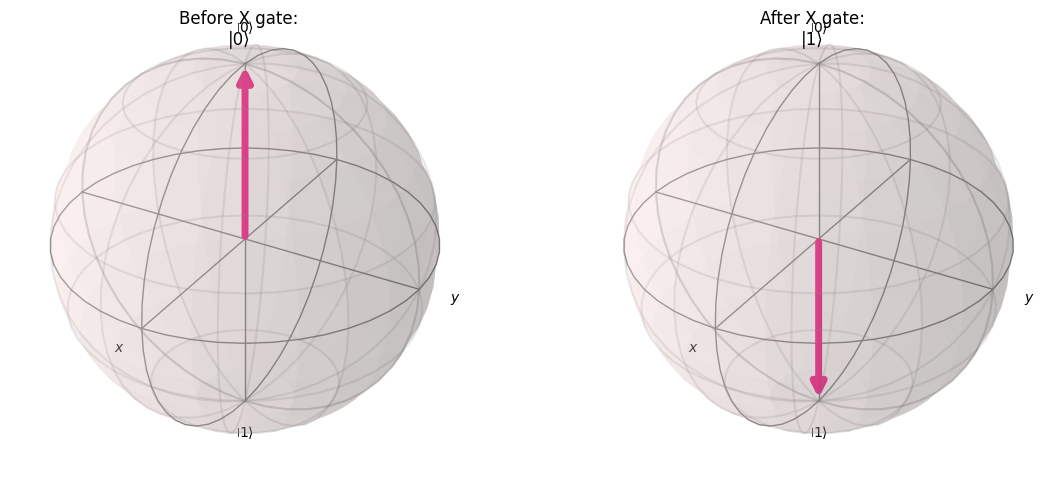

Before: [1.+0.j 0.+0.j]
After:  [0.+0.j 1.+0.j]

Effect: Flipped north pole → south pole


In [2]:
# Start with |0⟩
qc = QuantumCircuit(1)
state_before = Statevector(qc)

# Apply X gate
qc.x(0)
state_after = Statevector(qc)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
plot_bloch_vector([
    state_before.expectation_value(Pauli('X')),
    state_before.expectation_value(Pauli('Y')),
    state_before.expectation_value(Pauli('Z'))
], ax=ax1)
plot_bloch_vector([
    state_after.expectation_value(Pauli('X')),
    state_after.expectation_value(Pauli('Y')),
    state_after.expectation_value(Pauli('Z'))
], ax=ax2)
ax1.set_title('Before X gate:\n|0⟩', fontsize=12)
ax2.set_title('After X gate:\n|1⟩', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Before: {state_before.data}")
print(f"After:  {state_after.data}")
print(f"\nEffect: Flipped north pole → south pole")

## 2. Z Gate - Phase Flip

The Z gate rotates 180° around the Z-axis.  
It leaves |0⟩ unchanged but multiplies |1⟩ by -1.

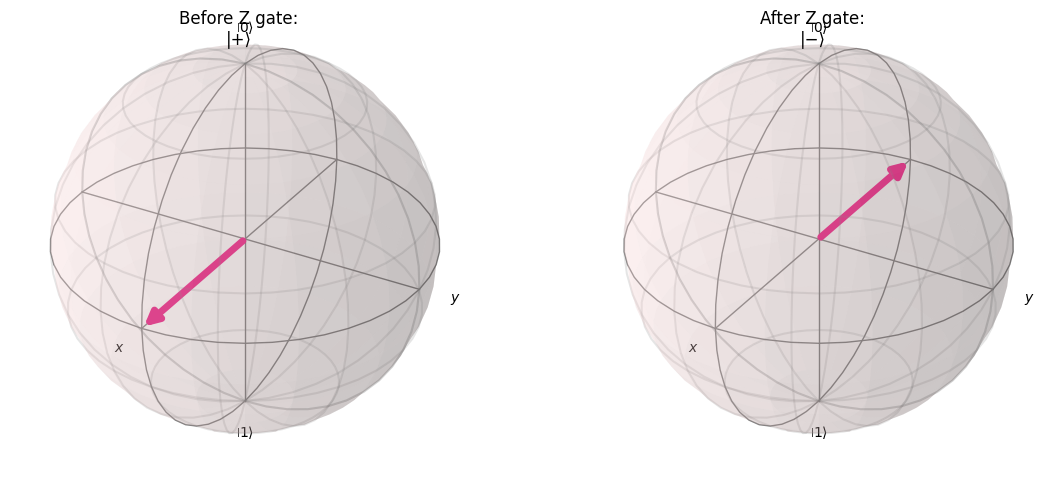

Before: [0.707+0.j 0.707+0.j]
After:  [ 0.707+0.j -0.707+0.j]

Measurement probabilities:
Before: [0.5 0.5]
After:  [0.5 0.5]

→ Same probabilities! But different states.
→ Z changed the phase, not the probabilities.


In [3]:
# Start with |+⟩ = (|0⟩ + |1⟩)/√2
qc = QuantumCircuit(1)
qc.h(0)  # Create |+⟩
state_before = Statevector(qc)

# Apply Z gate
qc.z(0)
state_after = Statevector(qc)  # Now |−⟩ = (|0⟩ - |1⟩)/√2

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
plot_bloch_vector([
    state_before.expectation_value(Pauli('X')),
    state_before.expectation_value(Pauli('Y')),
    state_before.expectation_value(Pauli('Z'))
], ax=ax1)
plot_bloch_vector([
    state_after.expectation_value(Pauli('X')),
    state_after.expectation_value(Pauli('Y')),
    state_after.expectation_value(Pauli('Z'))
], ax=ax2)
ax1.set_title('Before Z gate:\n|+⟩', fontsize=12)
ax2.set_title('After Z gate:\n|−⟩', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Before: {state_before.data}")
print(f"After:  {state_after.data}")
print(f"\nMeasurement probabilities:")
print(f"Before: {state_before.probabilities()}")
print(f"After:  {state_after.probabilities()}")
print(f"\n→ Same probabilities! But different states.")
print(f"→ Z changed the phase, not the probabilities.")

## 3. H Gate - Hadamard

H creates and destroys superposition.  
It rotates between poles and equator.

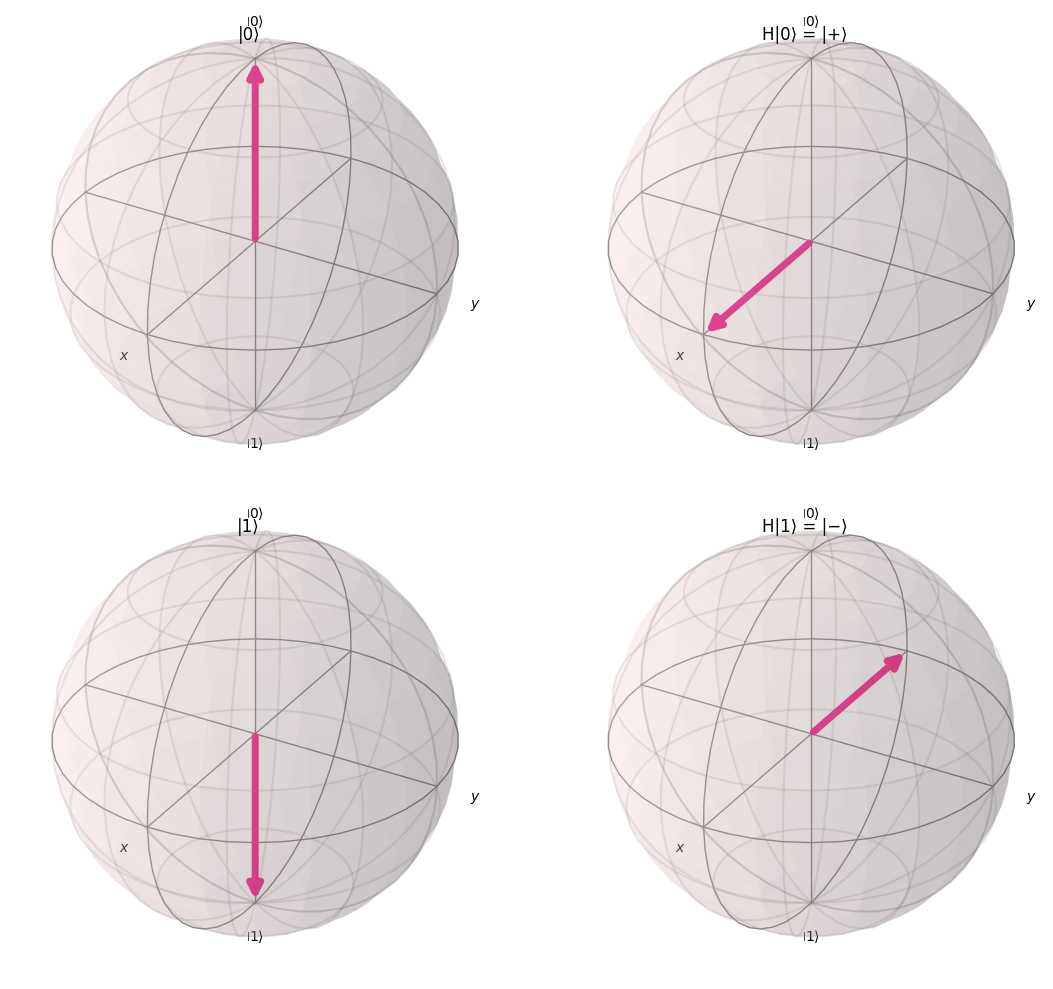

H|0⟩ = [0.707+0.j 0.707+0.j] = |+⟩
H|1⟩ = [ 0.707+0.j -0.707+0.j] = |−⟩

H doesn't just 'create superposition'
It rotates the state to the equator (with phase).


In [6]:
# H on |0⟩
qc1 = QuantumCircuit(1)
before1 = Statevector(qc1)
qc1.h(0)
after1 = Statevector(qc1)

# H on |1⟩
qc2 = QuantumCircuit(1)
qc2.x(0)
before2 = Statevector(qc2)
qc2.h(0)
after2 = Statevector(qc2)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
plot_bloch_vector([
    before1.expectation_value(Pauli('X')),
    before1.expectation_value(Pauli('Y')),
    before1.expectation_value(Pauli('Z'))
], ax=axes[0,0])
plot_bloch_vector([
    after1.expectation_value(Pauli('X')),
    after1.expectation_value(Pauli('Y')),
    after1.expectation_value(Pauli('Z'))
], ax=axes[0,1])
plot_bloch_vector([
    before2.expectation_value(Pauli('X')),
    before2.expectation_value(Pauli('Y')),
    before2.expectation_value(Pauli('Z'))
], ax=axes[1,0])
plot_bloch_vector([
    after2.expectation_value(Pauli('X')),
    after2.expectation_value(Pauli('Y')),
    after2.expectation_value(Pauli('Z'))
], ax=axes[1,1])

axes[0,0].set_title('|0⟩', fontsize=12)
axes[0,1].set_title('H|0⟩ = |+⟩', fontsize=12)
axes[1,0].set_title('|1⟩', fontsize=12)
axes[1,1].set_title('H|1⟩ = |−⟩', fontsize=12)

plt.tight_layout()
plt.show()

print("H|0⟩ =", after1.data, "= |+⟩")
print("H|1⟩ =", after2.data, "= |−⟩")
print("\nH doesn't just 'create superposition'")
print("It rotates the state to the equator (with phase).")

## 4. S and T Gates - Phase Rotations

S = √Z (90° rotation)  
T = √S (45° rotation)

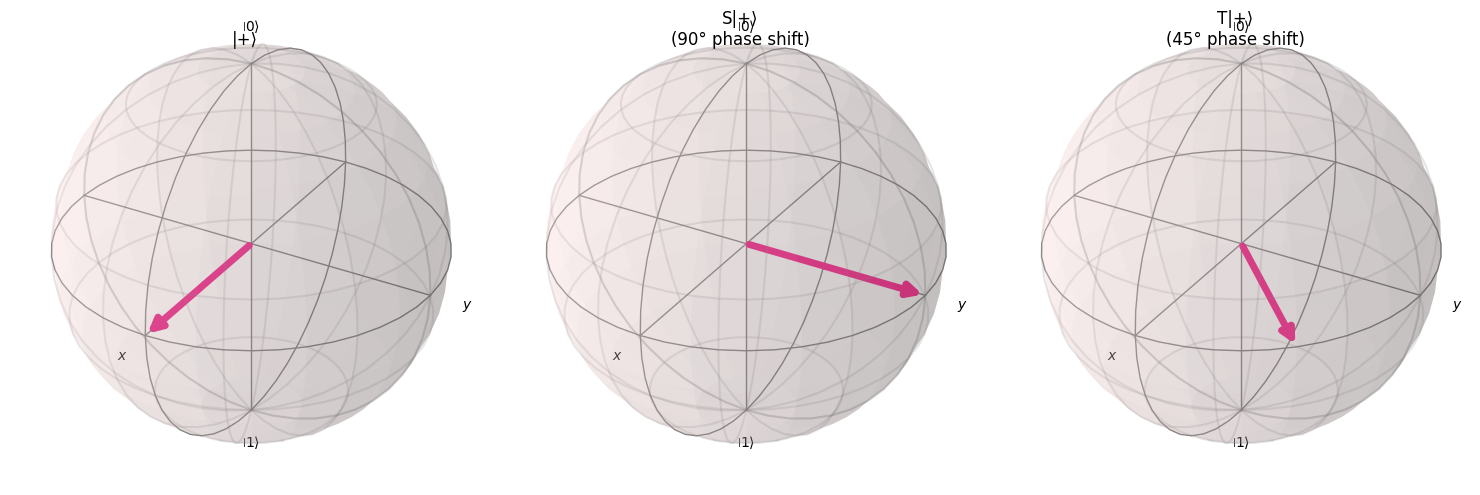

|+⟩  : [0.707+0.j 0.707+0.j]
S|+⟩ : [0.707+0.j    0.   +0.707j]
T|+⟩ : [0.707+0.j  0.5  +0.5j]

All still on the equator (50/50 probabilities)
But rotated around the Z-axis by different amounts.


In [7]:
# Start with |+⟩ and apply S, T gates
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
state_plus = Statevector(qc_plus)

qc_s = qc_plus.copy()
qc_s.s(0)
state_s = Statevector(qc_s)

qc_t = qc_plus.copy()
qc_t.t(0)
state_t = Statevector(qc_t)

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})
plot_bloch_vector([
    state_plus.expectation_value(Pauli('X')),
    state_plus.expectation_value(Pauli('Y')),
    state_plus.expectation_value(Pauli('Z'))
], ax=ax1)
plot_bloch_vector([
    state_s.expectation_value(Pauli('X')),
    state_s.expectation_value(Pauli('Y')),
    state_s.expectation_value(Pauli('Z'))
], ax=ax2)
plot_bloch_vector([
    state_t.expectation_value(Pauli('X')),
    state_t.expectation_value(Pauli('Y')),
    state_t.expectation_value(Pauli('Z'))
], ax=ax3)

ax1.set_title('|+⟩', fontsize=12)
ax2.set_title('S|+⟩\n(90° phase shift)', fontsize=12)
ax3.set_title('T|+⟩\n(45° phase shift)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"|+⟩  : {state_plus.data}")
print(f"S|+⟩ : {state_s.data}")
print(f"T|+⟩ : {state_t.data}")
print(f"\nAll still on the equator (50/50 probabilities)")
print(f"But rotated around the Z-axis by different amounts.")

## 5. Gate Composition

Gates can be combined to create any rotation.

In [ ]:
# Example: HZH = X
qc = QuantumCircuit(1)
state_initial = Statevector(qc)

qc.h(0)
qc.z(0)
qc.h(0)
state_final = Statevector(qc)

# Compare to just X
qc_x = QuantumCircuit(1)
qc_x.x(0)
state_x = Statevector(qc_x)

print("Initial state |0⟩:", state_initial.data)
print("After HZH:      ", state_final.data)
print("After X:        ", state_x.data)
print("\n→ HZH = X!")
print("→ Different gates, same rotation.")

Initial state |0⟩: [1.+0.j 0.+0.j]
After HZH:       [0.+0.j 1.+0.j]
After X:         [0.+0.j 1.+0.j]

→ HZH = X!
→ Different gates, same rotation.


: 

## Summary

From this notebook, you should understand:

1. **Gates are rotations** — X, Z, H rotate the Bloch vector
2. **X flips probabilities** — swaps |0⟩ and |1⟩
3. **Z flips phase** — invisible to measurement alone
4. **S and T fine-tune phase** — smaller rotations around Z-axis
5. **Gates compose** — combine to create any rotation

**Next:** [Measurement Demo](./measurement-demo.ipynb)  
Where we'll see why measurement destroys quantum information.